In [1]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../utils/')
import FigureConfig as FC
import pandas as pd

In [2]:
alpha = torch.linspace(0,1,51)
dataset_num = 13
act = 'tanh'

In [3]:
result_AL = torch.load(f'result_AL_{act}_haibin.matrix')
result_AL.shape

torch.Size([10, 4, 13, 12])

In [6]:
devices_result_AL = torch.load(f'devices_result_AL_{act}.matrix')
devices_result_AL.shape

torch.Size([10, 4, 13, 4])

In [4]:
all_acc = []
all_power = []
for i in range(13):
    acc, indices = torch.topk(result_AL[:, 0, i, 6], k=3)
    all_acc.append(acc)
    all_power.append(result_AL[indices, 0, i, 7]*1e-3)
torch.stack(all_acc).mean(), torch.stack(all_power).mean()

(tensor(0.6729), tensor(0.2463))

In [5]:
result_table = result_AL.clone()
result_table[:,0,:,6].shape, result_table[:,0,:,6].mean(0).shape

(torch.Size([10, 13]), torch.Size([13]))

In [7]:
devices_result_table = devices_result_AL.clone()
devices_result_table[:,0,:,-1].shape, devices_result_table[:,0,:,-1].mean(0).shape

(torch.Size([10, 13]), torch.Size([13]))

In [8]:
# Clone the result table
result_table = result_AL.clone()
devices_result_table = devices_result_AL.clone()


# 20%
top_3_acc_20, indices_20 = result_table[:, 0, :, 6].sort(dim=0, descending=True)
top_3_mean_acc_20 = top_3_acc_20[:3].mean(0)
top_3_std_acc_20 = top_3_acc_20[:3].std(0)

# Select power values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(result_table[indices_20[:3][:,i], 0, i, 7])
top_3_power_20 = torch.stack(temp_list)
top_3_mean_power_20 = top_3_power_20.mean(1)
top_3_std_power_20 = top_3_power_20.std(1)

# select devices values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(devices_result_table[indices_20[:3][:,i], 0, i, -1])
top_3_devices_20 = torch.stack(temp_list)
top_3_mean_devices_20 = top_3_devices_20.mean(1)
top_3_std_devices_20 = top_3_devices_20.std(1)


# 40%
top_3_acc_40, indices_40 = result_table[:, 1, :, 6].sort(dim=0, descending=True)
top_3_mean_acc_40 = top_3_acc_40[:3].mean(0)
top_3_std_acc_40 = top_3_acc_40[:3].std(0)

# Select power values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(result_table[indices_40[:3][:,i], 1, i, 7])
top_3_power_40 = torch.stack(temp_list)
top_3_mean_power_40 = top_3_power_40.mean(1)
top_3_std_power_40 = top_3_power_40.std(1)

# Select devices values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(devices_result_table[indices_40[:3][:,i], 1, i, -1])
top_3_devices_40 = torch.stack(temp_list)
top_3_mean_devices_40 = top_3_devices_40.mean(1)
top_3_std_devices_40 = top_3_devices_40.std(1)

# 60%
top_3_acc_60, indices_60 = result_table[:, 2, :, 6].sort(dim=0, descending=True)
top_3_mean_acc_60 = top_3_acc_60[:3].mean(0)
top_3_std_acc_60 = top_3_acc_60[:3].std(0)

# Select power values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(result_table[indices_60[:3][:,i], 2, i, 7])
top_3_power_60 = torch.stack(temp_list)
top_3_mean_power_60 = top_3_power_60.mean(1)
top_3_std_power_60 = top_3_power_60.std(1)

# Select devices values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(devices_result_table[indices_60[:3][:,i], 2, i, -1])
top_3_devices_60 = torch.stack(temp_list)
top_3_mean_devices_60 = top_3_devices_60.mean(1)
top_3_std_devices_60 = top_3_devices_60.std(1)

# 80%
top_3_acc_80, indices_80 = result_table[:, 3, :, 6].sort(dim=0, descending=True)
top_3_mean_acc_80 = top_3_acc_80[:3].mean(0)
top_3_std_acc_80 = top_3_acc_80[:3].std(0)

# Select power values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(result_table[indices_80[:3][:,i], 3, i, 7])
top_3_power_80 = torch.stack(temp_list)
top_3_mean_power_80 = top_3_power_80.mean(1)
top_3_std_power_80 = top_3_power_80.std(1)

# Select devices values based on top accuracy indices
temp_list = []
for i in range(dataset_num):
    temp_list.append(devices_result_table[indices_80[:3][:,i], 3, i, -1])
top_3_devices_80 = torch.stack(temp_list)
top_3_mean_devices_80 = top_3_devices_80.mean(1)
top_3_std_devices_80 = top_3_devices_80.std(1)

In [9]:


table = torch.stack([top_3_mean_devices_20, top_3_std_devices_20,
                     top_3_mean_devices_40, top_3_std_devices_40,
                     top_3_mean_devices_60, top_3_std_devices_60,
                     top_3_mean_devices_80, top_3_std_devices_80]).T
table = table.detach().numpy()
columns = ['20%', '20% std', '40%', '40% std', '60%', '60% std', '80%', '80% std']

# Convert to DataFrame for better presentation
df = pd.DataFrame(
    table,
    columns=columns,
)

normal_datasets = ['Dataset_acuteinflammation.p',
                       'Dataset_balancescale.p',
                       'Dataset_breastcancerwisc.p',
                       'Dataset_cardiotocography3clases.p',
                       'Dataset_energyy1.p',
                       'Dataset_energyy2.p',
                       'Dataset_iris.p',
                       'Dataset_mammographic.p',
                       'Dataset_pendigits.p',
                       'Dataset_seeds.p',
                       'Dataset_tictactoe.p',
                       'Dataset_vertebralcolumn2clases.p',
                       'Dataset_vertebralcolumn3clases.p']

# Insert the new column at the first position (index 0)
df.insert(0, 'Dataset', normal_datasets)

# Save the DataFrame to a excel file
df.to_excel(f'AL_{act}_devices_result_table.xlsx', index=False)

# Display the DataFrame in a nice format
print(df.to_markdown())

|    | Dataset                           |      20% |   20% std |     40% |   40% std |     60% |   60% std |      80% |   80% std |
|---:|:----------------------------------|---------:|----------:|--------:|----------:|--------:|----------:|---------:|----------:|
|  0 | Dataset_acuteinflammation.p       |  8.33333 |   5.7735  | 15.6667 |   7.0946  | 30      |   9.64365 |  43.3333 |   1.52753 |
|  1 | Dataset_balancescale.p            | 10.6667  |   4.04145 | 20      |   1       | 33      |   7.81025 |  42.3333 |   0.57735 |
|  2 | Dataset_breastcancerwisc.p        | 17       |   2.64575 | 30      |   9.84886 | 54.3333 |   3.78594 |  58.6667 |   1.52753 |
|  3 | Dataset_cardiotocography3clases.p | 29       |   1       | 53.3333 |  16.0728  | 84.3333 |   6.50641 |  98.3333 |   3.05505 |
|  4 | Dataset_energyy1.p                | 21.6667  |  15.5671  | 32      |   0       | 43.6667 |   5.50757 |  55.3333 |   1.1547  |
|  5 | Dataset_energyy2.p                | 16       |   4.58258 | 35.

In [10]:
import pandas as pd

table = torch.stack([top_3_mean_acc_20*100, top_3_std_acc_20*100, top_3_mean_power_20*1e-3, top_3_std_power_20*1e-3,
                     top_3_mean_acc_40*100, top_3_std_acc_40*100, top_3_mean_power_40*1e-3, top_3_std_power_40*1e-3,
                     top_3_mean_acc_60*100, top_3_std_acc_60*100, top_3_mean_power_60*1e-3, top_3_std_power_60*1e-3,
                     top_3_mean_acc_80*100, top_3_std_acc_80*100, top_3_mean_power_80*1e-3, top_3_std_power_80*1e-3,]).T
table = table.numpy()
np.savetxt('resut_table.txt', table, delimiter='\t', fmt='%0.5f')
# power in mW - the power were in watts and we convert to mW
columns = ['mean_acc_20', 'std_acc_20', 'mean_power_20 (mili)', 'std_power_20',
           'mean_acc_40', 'std_acc_40', 'mean_power_40 (mili)', 'std_power_40',
           'mean_acc_60', 'std_acc_60', 'mean_power_60 (mili)', 'std_power_60',
           'mean_acc_80', 'std_acc_80', 'mean_power_80 (mili)', 'std_power_80',]

# Convert to DataFrame for better presentation
df = pd.DataFrame(
    table,
    columns=columns,
)

normal_datasets = ['Dataset_acuteinflammation.p',
                       'Dataset_balancescale.p',
                       'Dataset_breastcancerwisc.p',
                       'Dataset_cardiotocography3clases.p',
                       'Dataset_energyy1.p',
                       'Dataset_energyy2.p',
                       'Dataset_iris.p',
                       'Dataset_mammographic.p',
                       'Dataset_pendigits.p',
                       'Dataset_seeds.p',
                       'Dataset_tictactoe.p',
                       'Dataset_vertebralcolumn2clases.p',
                       'Dataset_vertebralcolumn3clases.p']

# Insert the new column at the first position (index 0)
df.insert(0, 'Dataset', normal_datasets)

# Save the DataFrame to a excel file
df.to_excel(f'AL_{act}_result_table.xlsx', index=False)

# Display the DataFrame in a nice format
print(df.to_markdown())

|    | Dataset                           |   mean_acc_20 |   std_acc_20 |   mean_power_20 (mili) |   std_power_20 |   mean_acc_40 |   std_acc_40 |   mean_power_40 (mili) |   std_power_40 |   mean_acc_60 |   std_acc_60 |   mean_power_60 (mili) |   std_power_60 |   mean_acc_80 |   std_acc_80 |   mean_power_80 (mili) |   std_power_80 |
|---:|:----------------------------------|--------------:|-------------:|-----------------------:|---------------:|--------------:|-------------:|-----------------------:|---------------:|--------------:|-------------:|-----------------------:|---------------:|--------------:|-------------:|-----------------------:|---------------:|
|  0 | Dataset_acuteinflammation.p       |       98.6667 |     2.3094   |               0.176248 |      0.0361962 |      100      |     0        |               0.355168 |    0.00238248  |      100      |     0        |               0.519392 |      0.0542705 |      100      |     0        |               0.712078 |      0.05272

In [11]:
# load baseline result for HS
if act == 'hs':
    result = torch.load(f'result_baeline_HS.matrix')
# load baseline result for ReLU
elif act == 'relu':
    result = torch.load(f'result_baeline_ReLU.matrix')
elif act == 'tanh':
    result = torch.load(f'result_baeline_Tanh.matrix')
result.shape

torch.Size([13, 10, 51, 8])

In [12]:
act

'tanh'

In [13]:
target = torch.load(f'target.matrix')
target.shape

torch.Size([4, 13])

In [14]:
pareto = torch.load(f'pareto_baseline_{act}.curves')
pareto.shape

torch.Size([13, 2, 1000])

# Pareto

In [15]:
acc_points_ft   = result[:,:,:,6]
power_points_ft = result[:,:,:,7] / 1e3
acc_points_ft.shape

torch.Size([13, 10, 51])

In [16]:
re_acc_pt         = result_AL[:,:,:,2]
re_power_pt       = result_AL[:,:,:,3] / 1e3
re_acc_ft         = result_AL[:,:,:,6]
re_power_ft       = result_AL[:,:,:,7] / 1e3

In [17]:
lims = [[0,1000 / 1e3],
        [0,1200 / 1e3],
        [0,2000 / 1e3],
        [0,2500 / 1e3],
        [0,1500 / 1e3],
        [0,1500 / 1e3],
        [0,1000 / 1e3],
        [0,1500 / 1e3],
        [0,3000 / 1e3],
        [0,1400 / 1e3],
        [0,1700 / 1e3],
        [0,1400 / 1e3],
        [0,1200 / 1e3]]

In [18]:
colors = [FC.Blue, FC.Orange, FC.Red, FC.Black]

0 0 tensor(4)
0 1 tensor(2)
0 2 tensor(1)
0 3 tensor(0)


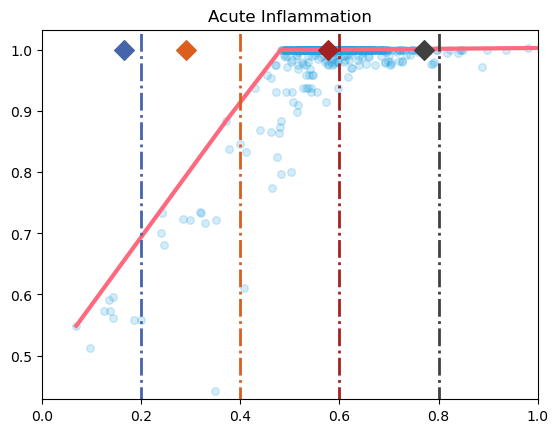

1 0 tensor(4)
1 1 tensor(0)
1 2 tensor(9)
1 3 tensor(4)


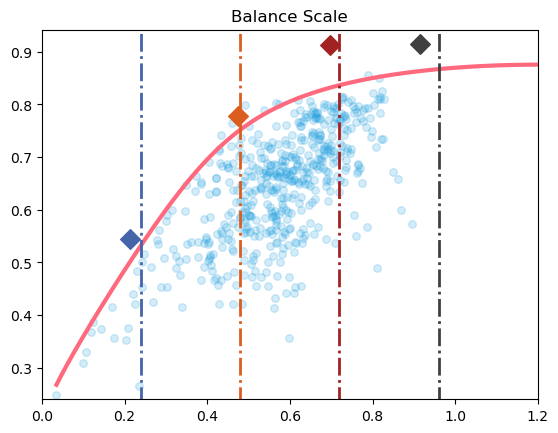

2 0 tensor(3)
2 1 tensor(9)
2 2 tensor(6)
2 3 tensor(0)


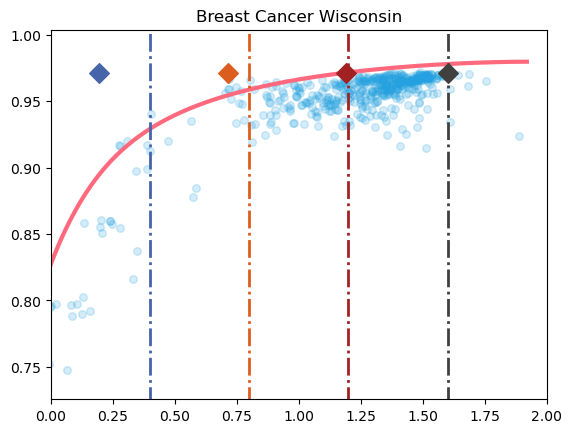

3 0 tensor(5)
3 1 tensor(7)
3 2 tensor(8)
3 3 tensor(4)


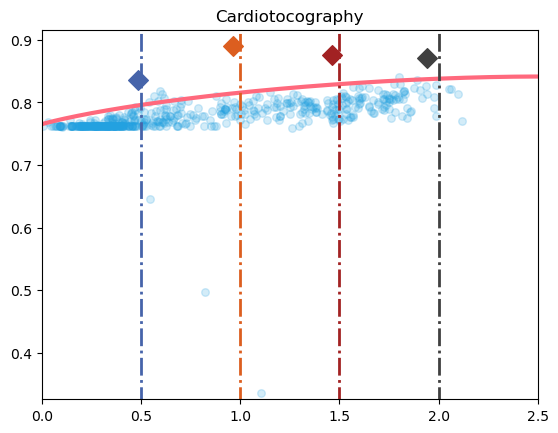

4 0 tensor(2)
4 1 tensor(3)
4 2 tensor(4)
4 3 tensor(2)


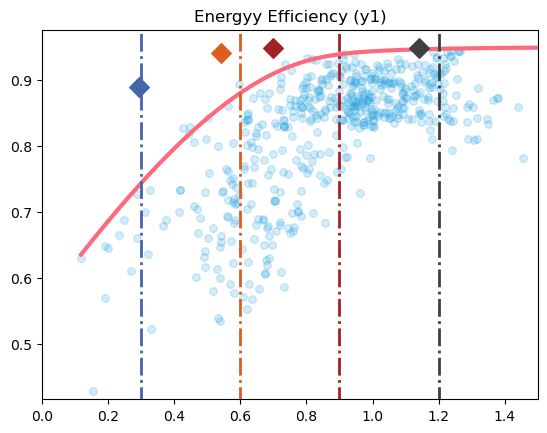

5 0 tensor(3)
5 1 tensor(9)
5 2 tensor(4)
5 3 tensor(4)


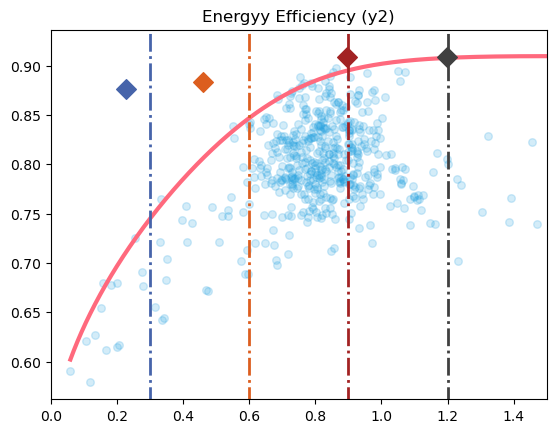

6 0 tensor(0)
6 1 tensor(8)
6 2 tensor(5)
6 3 tensor(4)


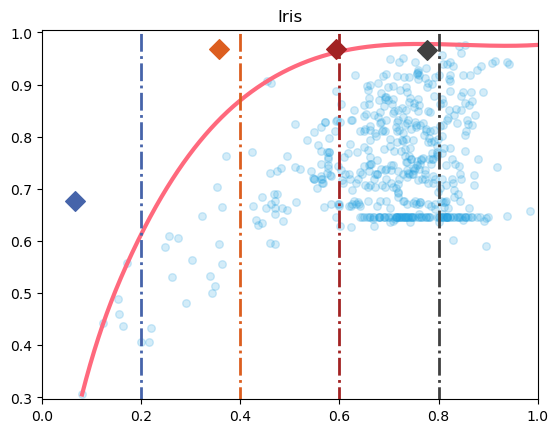

7 0 tensor(1)
7 1 tensor(5)
7 2 tensor(6)
7 3 tensor(4)


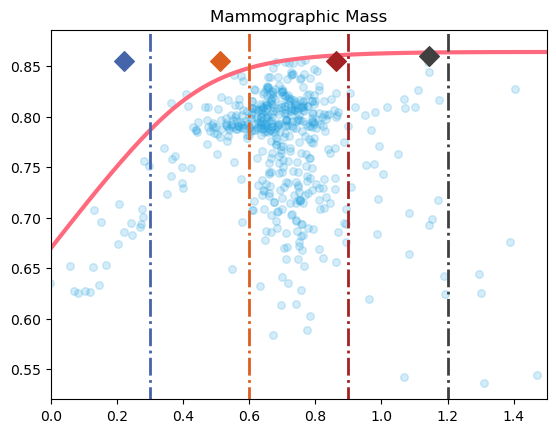

8 0 tensor(2)
8 1 tensor(3)
8 2 tensor(2)
8 3 tensor(6)


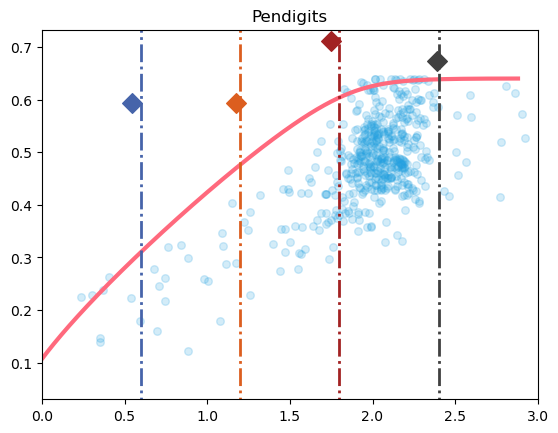

9 0 tensor(4)
9 1 tensor(6)
9 2 tensor(2)
9 3 tensor(4)


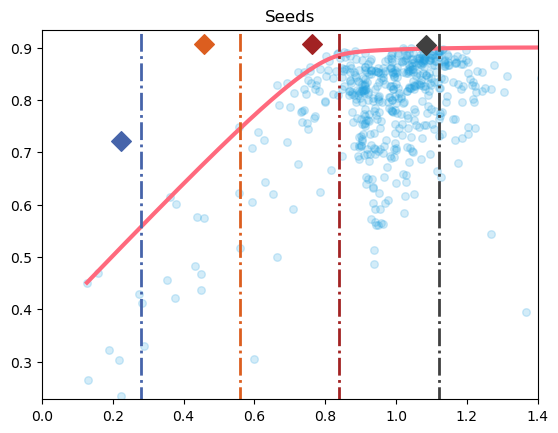

10 0 tensor(2)
10 1 tensor(2)
10 2 tensor(6)
10 3 tensor(7)


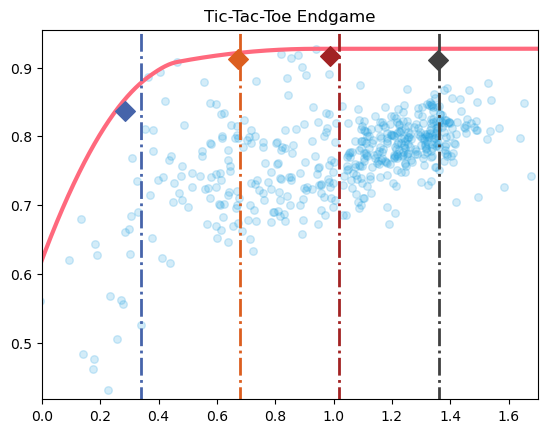

11 0 tensor(8)
11 1 tensor(2)
11 2 tensor(8)
11 3 tensor(9)


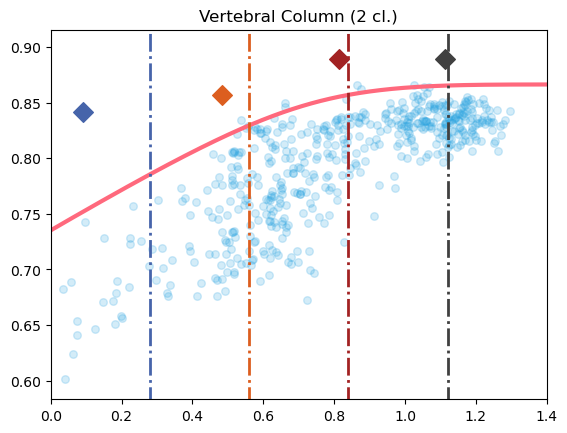

12 0 tensor(0)
12 1 tensor(0)
12 2 tensor(0)
12 3 tensor(8)


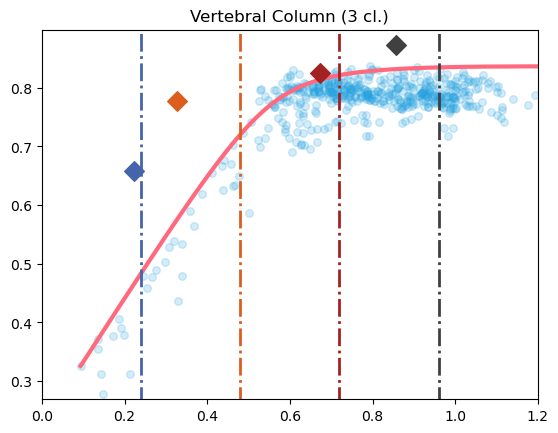

In [22]:
# baseline = torch.zeros([13,4])
# baseline[0,0] = 0.695
# baseline[0,1] = 0.918
# baseline[0,2] = 1.
# baseline[0,3] = 1.

# Tip: removing the outliers!

for ds in range(dataset_num):
    data = torch.stack([power_points_ft[ds].flatten(), acc_points_ft[ds].flatten()], dim=1).numpy()
    if ds == 0:
        x = data[:,0]
        y = data[:,1]
        invalid = (x<0.48) & (y>0.98)
        valid = ~invalid
        data = data[valid]
    if ds == 2:
        x = data[:,0]
        y = data[:,1]
        invalid = (x<0.7) & (y>0.95)
        valid = ~invalid
        data = data[valid]

    ymin = acc_points_ft[ds].flatten().min() * 0.97
    ymax = acc_points_ft[ds].flatten().max()
    
    pareto_x, pareto_y = pareto[ds,0,:], pareto[ds,1,:]
    
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], color=FC.Cyan, s=30, alpha=0.2)
    plt.plot(pareto_x, pareto_y, color=FC.Pink, lw=3)
    
    plt.xlim(lims[ds])

    power = target[:,ds] / 1000
    for i in range(4):
        idx = torch.argmax(result_AL[:,i,ds,2].flatten())
        print(ds,i,idx)
        plt.plot([power[i],power[i]], [0,1.5], '-.', color=colors[i], lw=2)
        plt.scatter(result_AL[idx,i,ds,3]/1e3,result_AL[idx,i,ds,2], marker='D', s=100, zorder=20, color=colors[i])
        ymax = max(ymax, result_AL[idx,i,ds,2])
    
    ymax = ymax * 1.03
    plt.ylim([ymin, ymax])
    
    name_datasets = ['Acute Inflammation.p',
                       'Balance Scale.p',
                       'Breast Cancer Wisconsin.p',
                       'Cardiotocography.p',
                       'Energyy Efficiency (y1).p',
                       'Energyy Efficiency (y2).p',
                       'Iris.p',
                       'Mammographic Mass.p',
                       'Pendigits.p',
                       'Seeds.p',
                       'Tic-Tac-Toe Endgame.p',
                       'Vertebral Column (2 cl.).p',
                       'Vertebral Column (3 cl.).p']
    
    plt.title(f'{name_datasets[ds][:-2]}')
    # plt.xlabel('power consumption')
    # plt.ylabel('classification accuracy')
    
    # plt.xticks([])
    # plt.yticks([])
    # plt.savefig(f"../figures/{ds:02d}.pdf", format='pdf', bbox_inches='tight', transparent=True)
    plt.show()

# Gather all dataset

In [58]:

# Read the excel files
df_hs = pd.read_excel('AL_HS_result_table.xlsx')

table_hs_acc_20 = df_hs['mean_acc_20'].to_numpy()[:-1]
table_hs_acc_40 = df_hs['mean_acc_40'].to_numpy()[:-1]
table_hs_acc_60 = df_hs['mean_acc_60'].to_numpy()[:-1]
table_hs_acc_80 = df_hs['mean_acc_80'].to_numpy()[:-1]

table_hs_power_20 = df_hs['mean_power_20 (mili)'].to_numpy()[:-1]
table_hs_power_40 = df_hs['mean_power_40 (mili)'].to_numpy()[:-1]
table_hs_power_60 = df_hs['mean_power_60 (mili)'].to_numpy()[:-1]
table_hs_power_80 = df_hs['mean_power_80 (mili)'].to_numpy()[:-1]
# ----------------------------------------------
df_relu = pd.read_excel('AL_relu_result_table.xlsx')
table_relu = df_relu.to_numpy()

table_relu_acc_20 = df_relu['mean_acc_20'].to_numpy()[:-1]
table_relu_acc_40 = df_relu['mean_acc_40'].to_numpy()[:-1]
table_relu_acc_60 = df_relu['mean_acc_60'].to_numpy()[:-1]
table_relu_acc_80 = df_relu['mean_acc_80'].to_numpy()[:-1]

table_relu_power_20 = df_relu['mean_power_20 (mili)'].to_numpy()[:-1]
table_relu_power_40 = df_relu['mean_power_40 (mili)'].to_numpy()[:-1]
table_relu_power_60 = df_relu['mean_power_60 (mili)'].to_numpy()[:-1]
table_relu_power_80 = df_relu['mean_power_80 (mili)'].to_numpy()[:-1]
# ----------------------------------------------
df_tanh = pd.read_excel('AL_tanh_result_table.xlsx')
table_tanh = df_tanh.to_numpy()

table_tanh_acc_20 = df_tanh['mean_acc_20'].to_numpy()[:-1]
table_tanh_acc_40 = df_tanh['mean_acc_40'].to_numpy()[:-1]
table_tanh_acc_60 = df_tanh['mean_acc_60'].to_numpy()[:-1]
table_tanh_acc_80 = df_tanh['mean_acc_80'].to_numpy()[:-1]

table_tanh_power_20 = df_tanh['mean_power_20 (mili)'].to_numpy()[:-1]
table_tanh_power_40 = df_tanh['mean_power_40 (mili)'].to_numpy()[:-1]
table_tanh_power_60 = df_tanh['mean_power_60 (mili)'].to_numpy()[:-1]
table_tanh_power_80 = df_tanh['mean_power_80 (mili)'].to_numpy()[:-1]
# ----------------------------------------------
df_sigma = pd.read_excel('AL_sigmoid_result_table.xlsx')
table_sigma = df_sigma.to_numpy()

table_sigma_acc_20 = df_sigma['mean_acc_20'].to_numpy()[:-1]
table_sigma_acc_40 = df_sigma['mean_acc_40'].to_numpy()[:-1]
table_sigma_acc_60 = df_sigma['mean_acc_60'].to_numpy()[:-1]
table_sigma_acc_80 = df_sigma['mean_acc_80'].to_numpy()[:-1]

table_sigma_power_20 = df_sigma['mean_power_20 (mili)'].to_numpy()[:-1]
table_sigma_power_40 = df_sigma['mean_power_40 (mili)'].to_numpy()[:-1]
table_sigma_power_60 = df_sigma['mean_power_60 (mili)'].to_numpy()[:-1]
table_sigma_power_80 = df_sigma['mean_power_80 (mili)'].to_numpy()[:-1]
# ----------------------------------------------
# Read the power limitation
target = np.array([[ 200.,  240.,  400.,  500.,  300.,  300.,  200.,  300.,  600.,  280.,  340.,  280.,  240.],
          [ 400.,  480.,  800., 1000.,  600.,  600.,  400.,  600., 1200.,  560.,  680.,  560.,  480.],
          [ 600.,  720., 1200., 1500.,  900.,  900.,  600.,  900., 1800.,  840., 1020.,  840.,  720.],
          [ 800.,  960., 1600., 2000., 1200., 1200.,  800., 1200., 2400., 1120., 1360., 1120.,  960.]])

lims = [[0,1000 / 1e3],
        [0,1200 / 1e3],
        [0,2000 / 1e3],
        [0,2500 / 1e3],
        [0,1500 / 1e3],
        [0,1500 / 1e3],
        [0,1000 / 1e3],
        [0,1500 / 1e3],
        [0,3000 / 1e3],
        [0,1400 / 1e3],
        [0,1700 / 1e3],
        [0,1400 / 1e3],
        [0,1200 / 1e3]]

In [97]:
# Flatten the list of lists
min([item for sublist in accs[:][:][2] for item in sublist])

28.87676048278809

In [106]:
table_relu_acc_20.shape

(13,)

In [118]:
np.array(accs)[:, :, 0].min()

43.99999618530273

In [113]:
accs[:][:][0]

[array([78.66667175, 40.47619247, 96.42856598, 81.53364563, 71.21212006,
        78.57143402, 34.40860367, 79.7927475 , 27.55798149, 72.09302521,
        92.88194275, 69.31216431, 60.31746292]),
 array([94.66667175, 81.2169342 , 92.61904144, 80.51643372, 83.76624298,
        83.98268127, 80.64516449, 84.97409058, 36.83492279, 65.89147186,
        63.02083206, 63.49206543, 57.67195892]),
 array([43.99999619, 42.06348801, 80.        , 76.29107666, 72.51081848,
        76.62337494, 49.4623642 , 79.62003326, 37.83538055, 65.89147186,
        63.02083206, 70.89946747, 55.55555344]),
 array([98.66667175, 31.74603271, 96.90476227, 80.51643372, 85.28138733,
        74.45886993, 65.59139252, 83.24697876, 35.24329376, 29.45736313,
        69.27082825, 68.25396729, 56.08465576])]

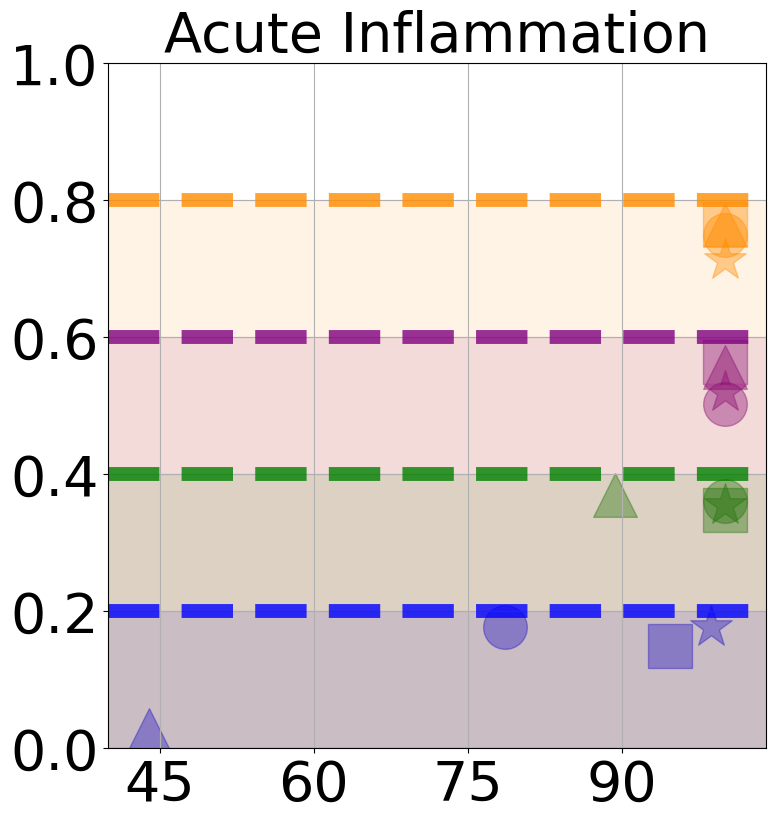

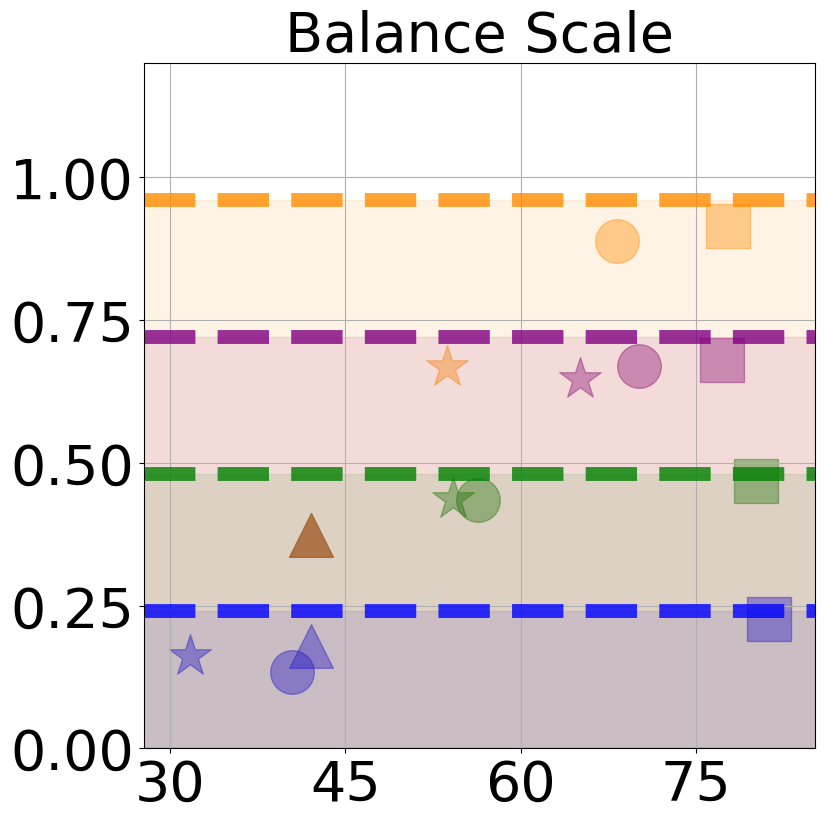

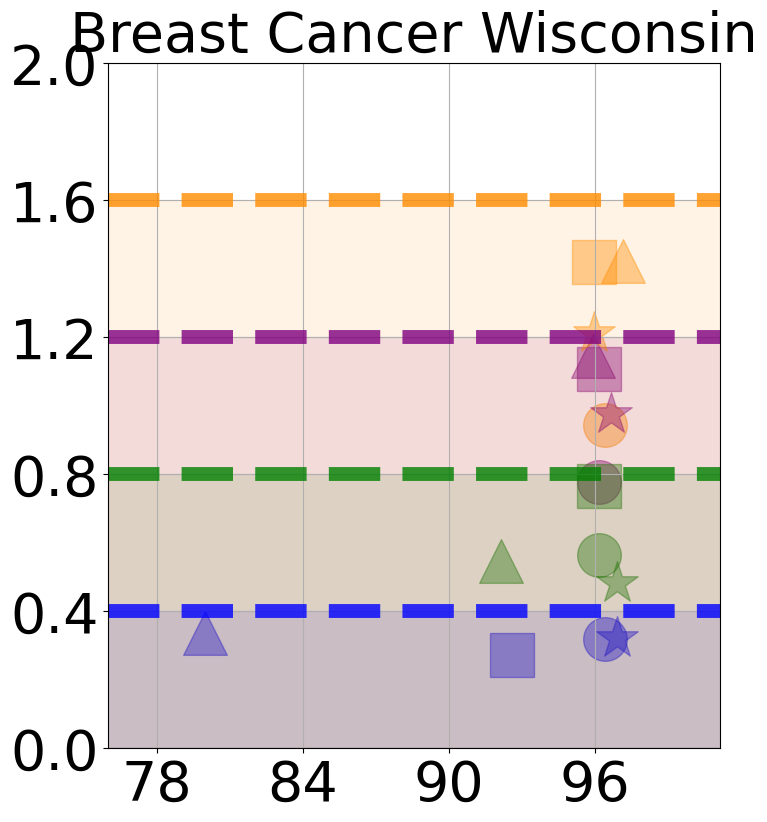

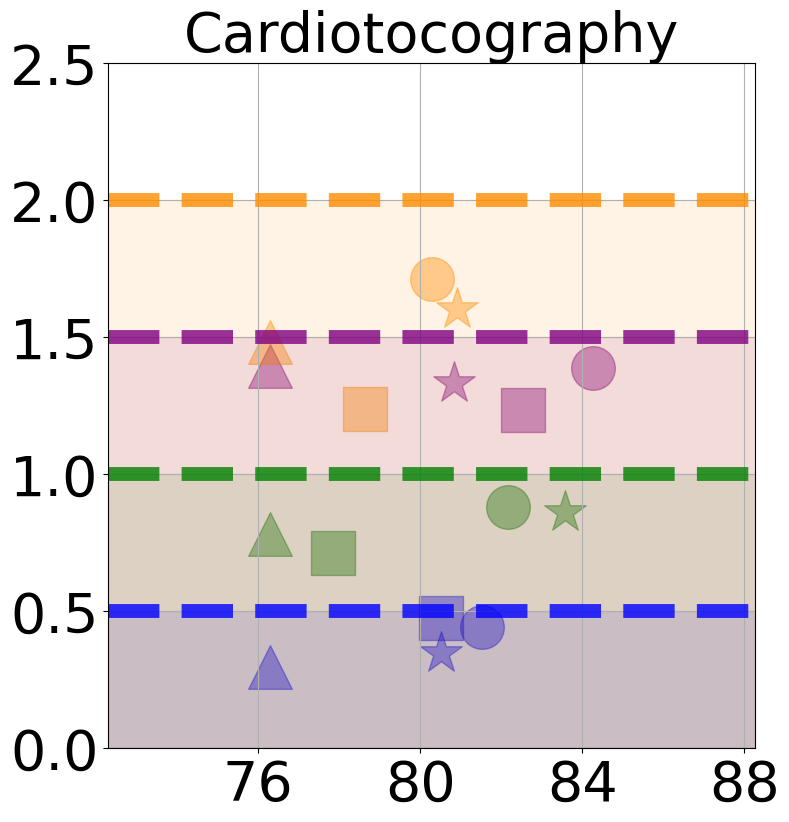

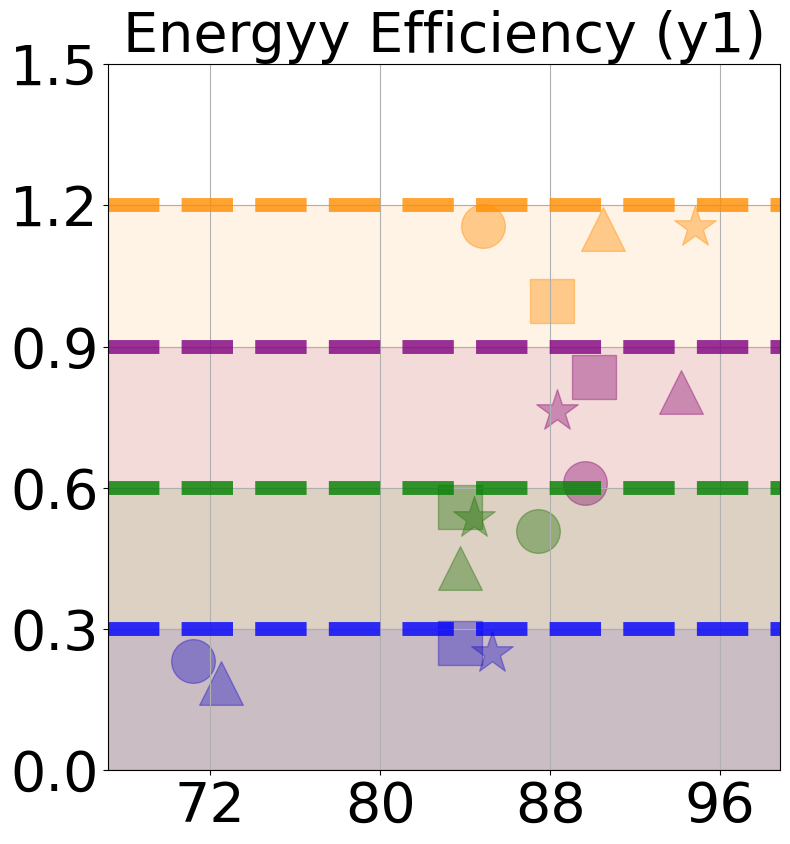

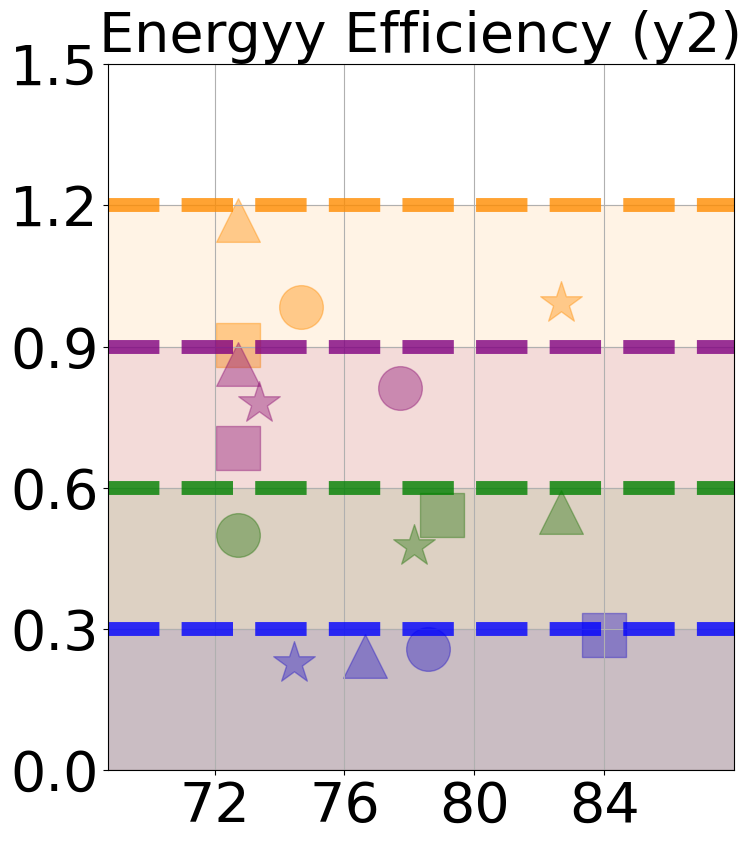

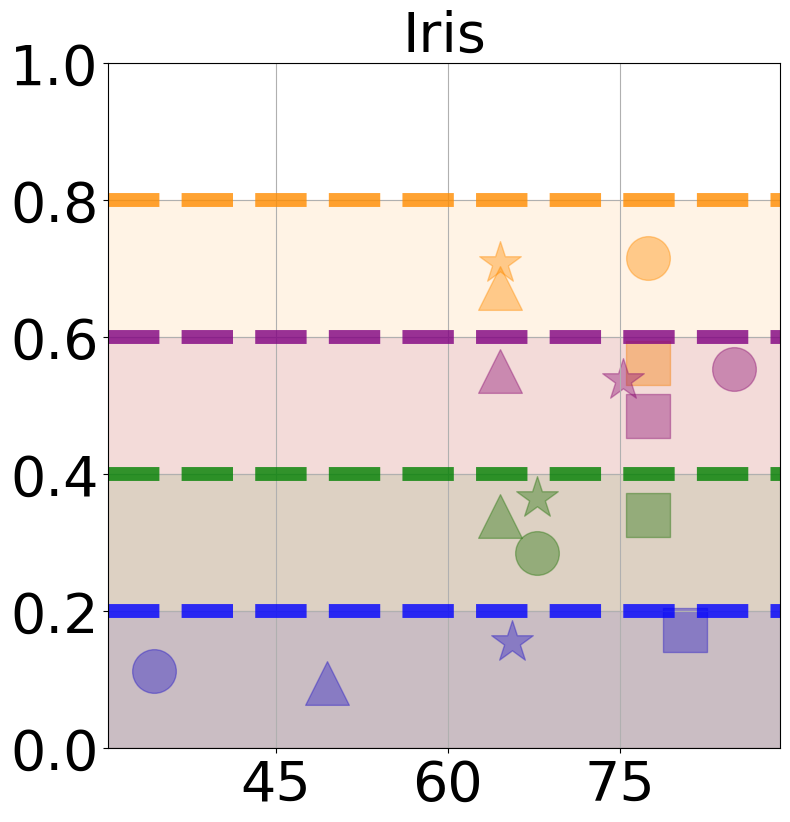

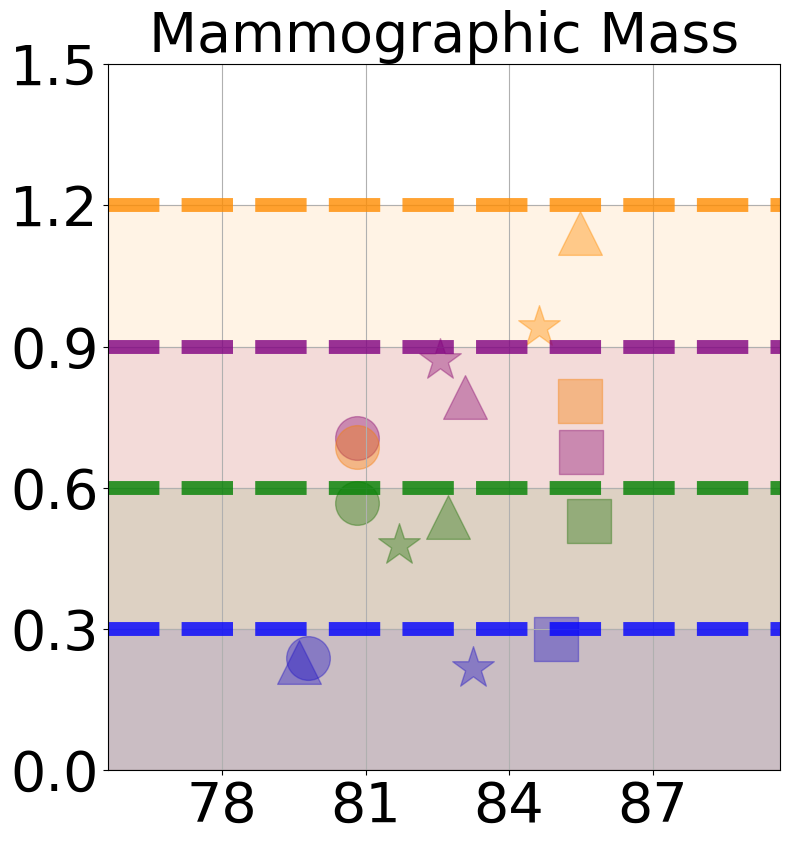

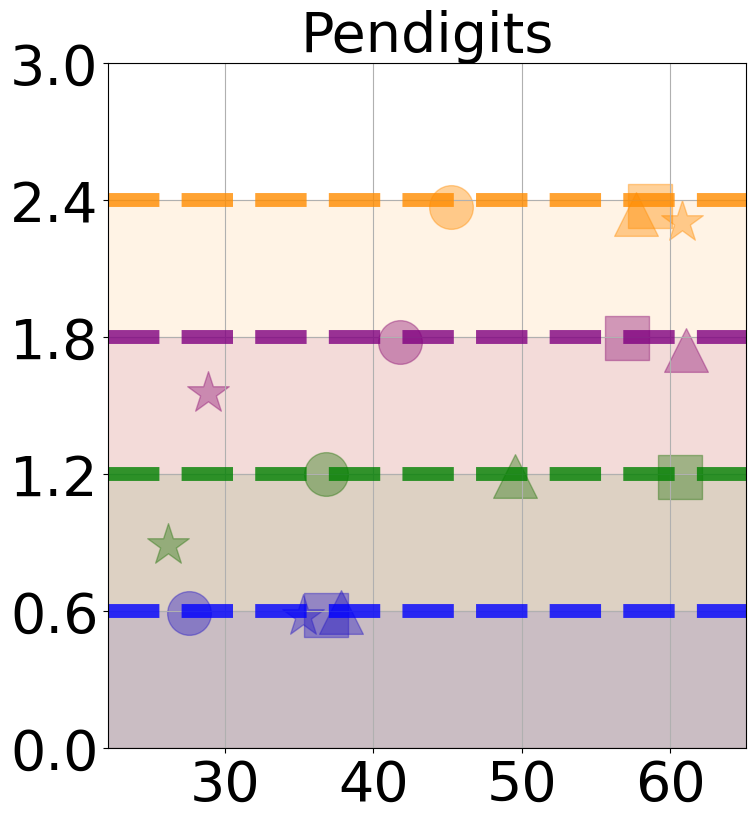

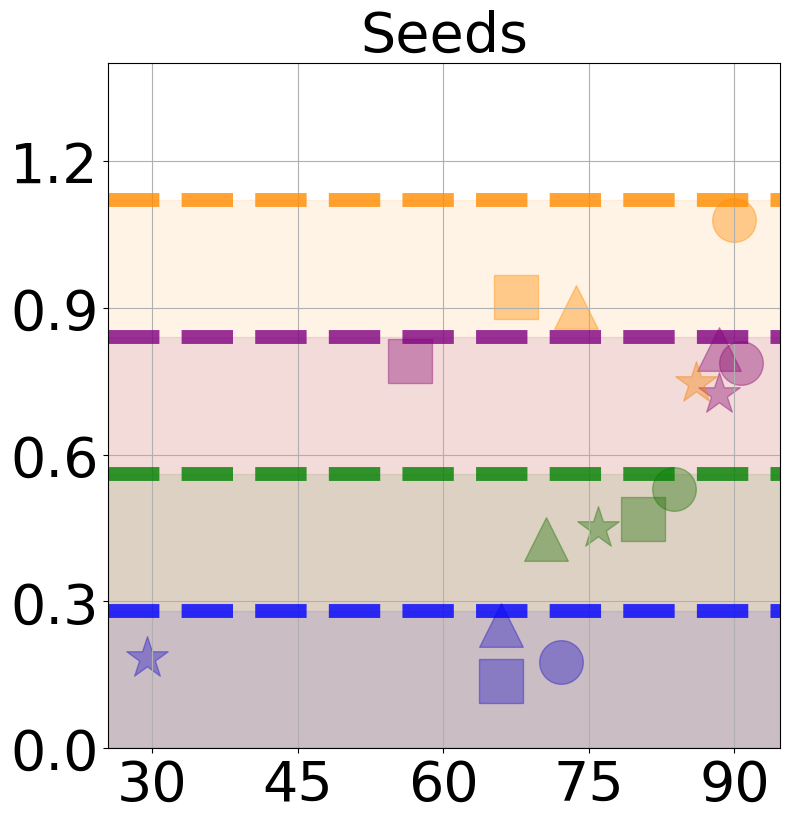

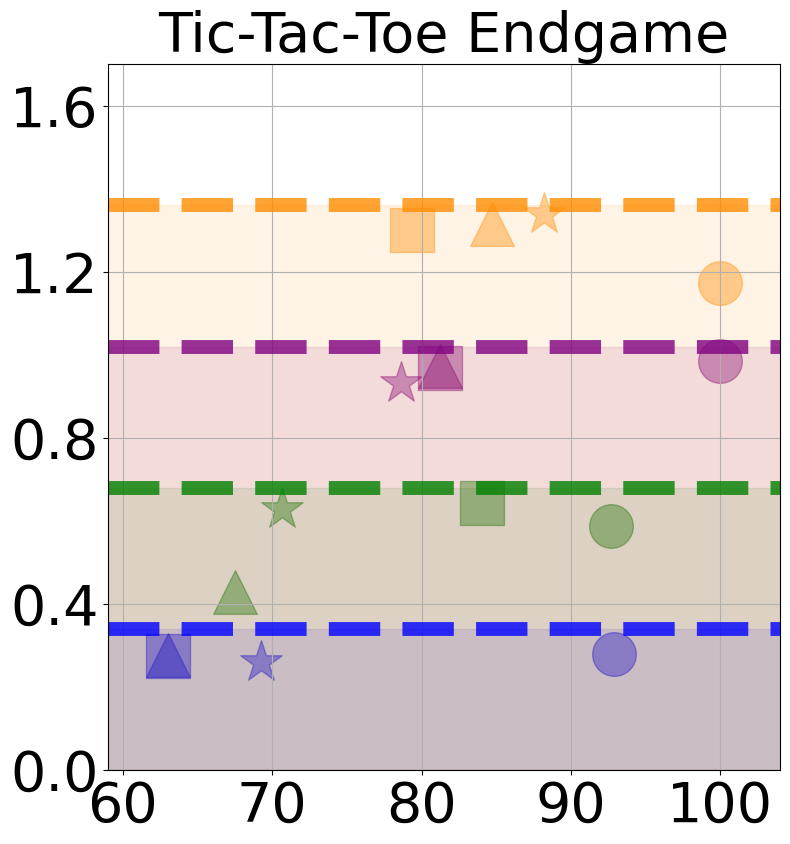

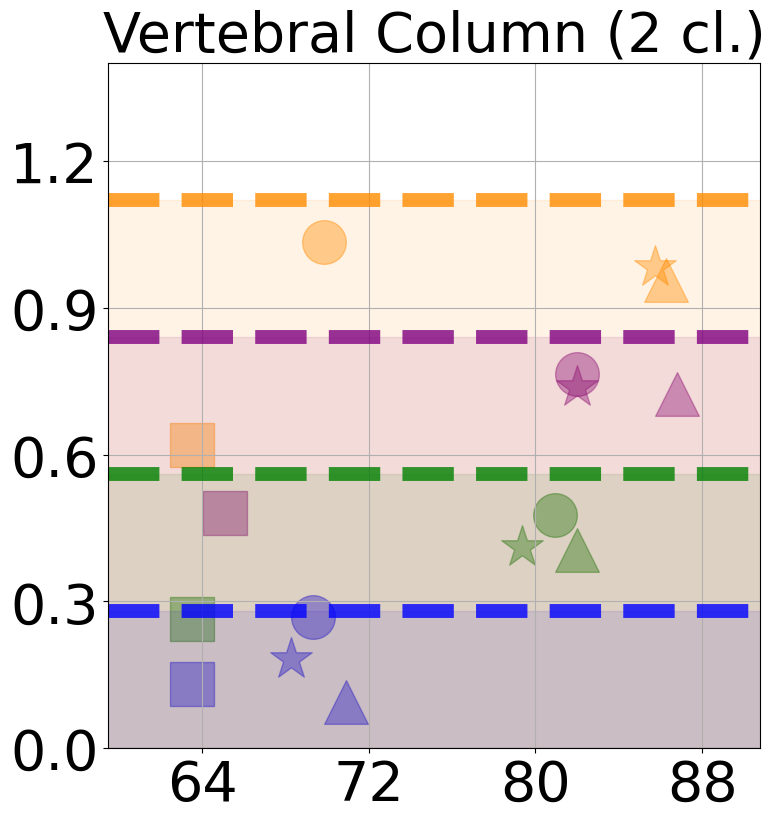

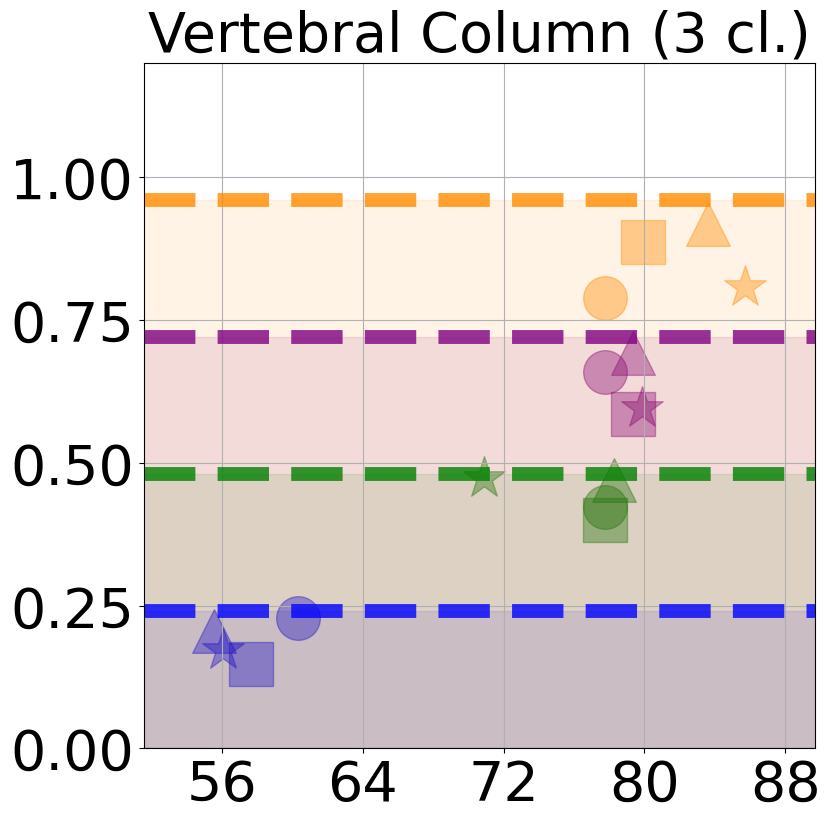

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
import random

# Example data (replace with actual results)
name_datasets = ['Acute Inflammation.p',
                       'Balance Scale.p',
                       'Breast Cancer Wisconsin.p',
                       'Cardiotocography.p',
                       'Energyy Efficiency (y1).p',
                       'Energyy Efficiency (y2).p',
                       'Iris.p',
                       'Mammographic Mass.p',
                       'Pendigits.p',
                       'Seeds.p',
                       'Tic-Tac-Toe Endgame.p',
                       'Vertebral Column (2 cl.).p',
                       'Vertebral Column (3 cl.).p']
    
activation_functions = ["ReLU", "CReLU", "Sigmoid", "Tanh"]
percentages = [20, 40, 60, 80]
# colors = {20: 'blue', 40: 'green', 60: 'purple', 80: 'darkred'}  # Updated color scheme for better contrast
colors = ['blue', 'green', 'purple', 'darkorange']  # Updated color scheme for better contrast
shapes = {"ReLU": 'o', "CReLU": 's', "Sigmoid": '^', "Tanh": '*'}  # Shapes for each activation function
powers = np.array([[table_relu_power_20, table_hs_power_20, table_sigma_power_20, table_tanh_power_20],
          [table_relu_power_40, table_hs_power_40, table_sigma_power_40, table_tanh_power_40],
          [table_relu_power_60, table_hs_power_60, table_sigma_power_60, table_tanh_power_60],
          [table_relu_power_80, table_hs_power_80, table_sigma_power_80, table_tanh_power_80]])
accs = np.array([[table_relu_acc_20, table_hs_acc_20, table_sigma_acc_20, table_tanh_acc_20],
        [table_relu_acc_40, table_hs_acc_40, table_sigma_acc_40, table_tanh_acc_40],
        [table_relu_acc_60, table_hs_acc_60, table_sigma_acc_60, table_tanh_acc_60],
        [table_relu_acc_80, table_hs_acc_80, table_sigma_acc_80, table_tanh_acc_80]])

# Define maximum power for calculating budget lines (replace with actual max power if known)
# max_power = 100
for dataset in range(len(name_datasets)):
    # Create the scatter plot
    plt.figure(figsize=(8, 8))
    min_acc = accs[:, :, dataset].min()
    max_acc = accs[:, :, dataset].max()
    plt.xlim(min_acc-4, max_acc+4)
    plt.ylim(lims[dataset][0], lims[dataset][1])
    power_budgets = target[:, dataset]*1e-3  # Power budget percentages

    for i, act_func in enumerate(activation_functions):
        for j, power_budget in enumerate(power_budgets):
            # Random data points (replace with actual accuracy and power values)
            accuracy = accs[j][i][dataset] + random.uniform(-0.005, 0.005)
            power = powers[j][i][dataset]
            
            # Scatter plot point
            plt.scatter(accuracy, power, 
                        color=colors[j], 
                        marker=shapes[act_func], 
                        s=990, alpha=0.4)  # Adjust size as needed
                
    # Add shaded regions and bold dashed lines for each power budget level
    for i, budget in enumerate(power_budgets):
        target_power = budget
        
        # Add shaded region below each power budget line
        plt.fill_betweenx(y=[0, target_power], x1=0, x2=max_acc+5, color=colors[i], alpha=0.1)

        
        # Add bold dashed power budget line
        plt.axhline(y=target_power, color=colors[i], linestyle='--', linewidth=10, alpha=0.8)
        # plt.text(max_acc+5, target_power + 0.02, f'{percentages[i]}% Budget', color=colors[i], 
        #     fontsize=30, fontweight='bold', ha='right')
        
    # Manually creating legend entries for power budget (color-based)
    color_legend = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', markersize=8, label=f'{budget}% Power Target')
                    for i, budget in enumerate(power_budgets)]

    # Manually creating legend entries for activation function (shape-based)
    shape_legend = [mlines.Line2D([], [], color='black', marker=shapes[act_func], linestyle='None', markersize=8, label=act_func)
                    for act_func in activation_functions]

    # # Add legends to the plot
    # first_legend = plt.legend(handles=color_legend, title="Power Budget Lines", loc='upper right', bbox_to_anchor=(1.2, 1))
    # plt.gca().add_artist(first_legend)  # Add the first legend to the plot
    # plt.legend(handles=shape_legend, title="Activation Function", loc='upper right', bbox_to_anchor=(1.2, 0.6))

    # Labels and grid
    # plt.xlabel("Accuracy")
    # plt.ylabel("Power (mW)")
    # plt.title("Power vs. Accuracy for Different Activation Functions Across Datasets")
    # Make x and y tick labels bold
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.grid(True)
    plt.tight_layout()
    plt.title(f'{name_datasets[dataset][:-2]}', fontsize=40)
    
    # Access the current axis and set the locator
    plt.gca().xaxis.set_major_locator(MaxNLocator(5))  # Set a maximum of 4 ticks on the x-axis
    plt.gca().yaxis.set_major_locator(MaxNLocator(5))  # Set a maximum of 4 ticks on the y-axis
    
    


    # save the figure
    if not os.path.isdir('./figures'):
        os.makedirs('./figures')
    plt.savefig(f"./figures/{dataset:02d}.jpg", format='jpg', bbox_inches='tight', transparent=True)
    plt.show()
    


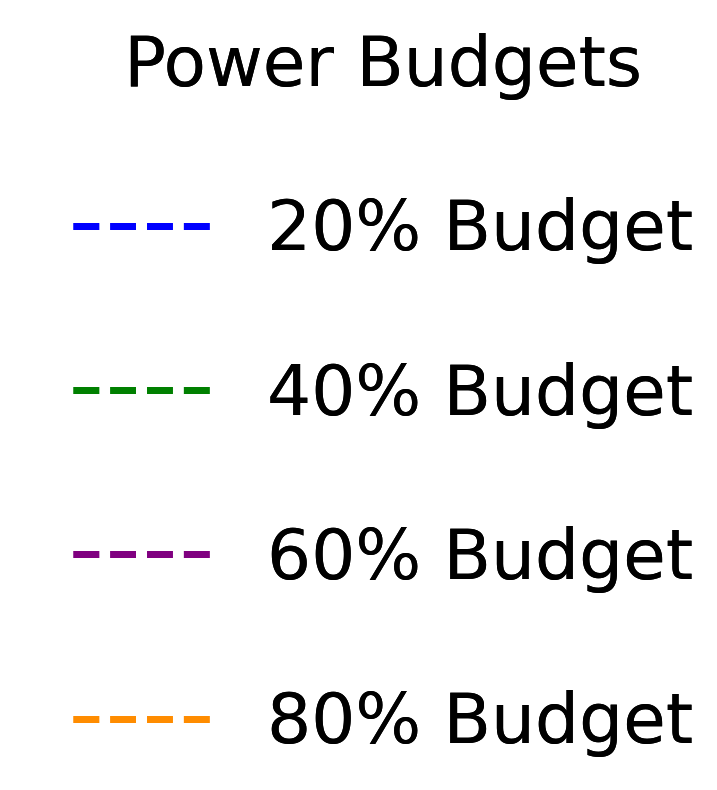

In [89]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# activation_functions = ["ReLU", "CReLU", "Sigmoid", "Tanh"]
# percentages = [20, 40, 60, 80]
# # colors = {20: 'blue', 40: 'green', 60: 'purple', 80: 'darkred'}  # Updated color scheme for better contrast
# colors = ['blue', 'green', 'purple', 'darkorange']  # Updated color scheme for better contrast
# shapes = {"ReLU": 'o', "CReLU": 's', "Sigmoid": '^', "Tanh": '*'}  # Shapes for each activation function

# Define colors, markers, and labels for the legend
colors = ['blue', 'green', 'purple', 'darkorange']  # Example colors for each power budget
markers = ['o', 's', '^', '*']  # Example markers for each activation function
power_budget_labels = ['20% Budget', '40% Budget', '60% Budget', '80% Budget']
activation_function_labels = ['ReLU', 'CReLU', 'Sigmoid', 'Tanh']

# Create legend handles for power budgets with bold and thicker lines
budget_legend_handles = [
    mlines.Line2D([], [], color=color, linestyle='--', linewidth=5, label=label)
    for color, label in zip(colors, power_budget_labels)
]

# Create legend handles for activation functions with bold markers
activation_legend_handles = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=40, label=label, markerfacecolor='black')
    for marker, label in zip(markers, activation_function_labels)
]

# Create the plot figure and add the legends
fig, ax = plt.subplots()

# Remove axes for a clean legend-only figure
ax.axis('off')

# size of the figure
fig.set_size_inches(9, 10)

# Display the legends with larger font size and bold style
first_legend = ax.legend(handles=budget_legend_handles, title='Power Budgets', loc='center left', frameon=False, fontsize=50, title_fontsize=50, labelspacing=1.4,)
# second_legend = ax.legend(handles=activation_legend_handles, title='Activation Functions', loc='center right', frameon=False, fontsize=12, title_fontsize=14, labelspacing=1.2)

# Make the first legend title bold
first_legend.get_title()
# second_legend.get_title().set_fontweight('bold')

# Add the first legend back to the axes
ax.add_artist(first_legend)

plt.show()


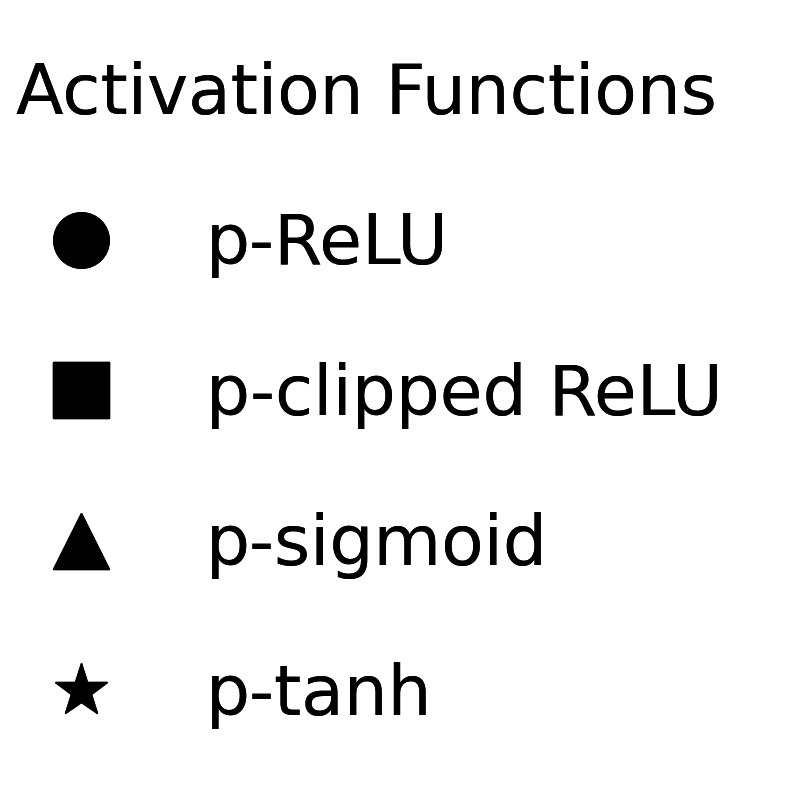

In [86]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# activation_functions = ["ReLU", "CReLU", "Sigmoid", "Tanh"]
# percentages = [20, 40, 60, 80]
# # colors = {20: 'blue', 40: 'green', 60: 'purple', 80: 'darkred'}  # Updated color scheme for better contrast
# colors = ['blue', 'green', 'purple', 'darkorange']  # Updated color scheme for better contrast
# shapes = {"ReLU": 'o', "CReLU": 's', "Sigmoid": '^', "Tanh": '*'}  # Shapes for each activation function

# Define colors, markers, and labels for the legend
colors = ['blue', 'green', 'purple', 'darkorange']  # Example colors for each power budget
markers = ['o', 's', '^', '*']  # Example markers for each activation function
power_budget_labels = ['20% Budget', '40% Budget', '60% Budget', '80% Budget']
activation_function_labels = ['p-ReLU', 'p-clipped ReLU', 'p-sigmoid', 'p-tanh']

# Create legend handles for power budgets with bold and thicker lines
budget_legend_handles = [
    mlines.Line2D([], [], color=color, linestyle='--', linewidth=5, label=label)
    for color, label in zip(colors, power_budget_labels)
]

# Create legend handles for activation functions with bold markers
activation_legend_handles = [
    mlines.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=40, label=label, markerfacecolor='black')
    for marker, label in zip(markers, activation_function_labels)
]

# Create the plot figure and add the legends
fig, ax = plt.subplots()

# Remove axes for a clean legend-only figure
ax.axis('off')

# size of the figure
fig.set_size_inches(10, 10)

# Display the legends with larger font size and bold style
# first_legend = ax.legend(handles=budget_legend_handles, title='Power Budgets', loc='center left', frameon=False, fontsize=25, title_fontsize=30, labelspacing=1.2)
second_legend = ax.legend(handles=activation_legend_handles, title='Activation Functions', loc='center right', frameon=False, fontsize=50, title_fontsize=50, labelspacing=1.2)

# Make the first legend title bold
# first_legend.get_title().set_fontweight('bold')
second_legend.get_title()

# Add the first legend back to the axes
ax.add_artist(second_legend)

plt.show()


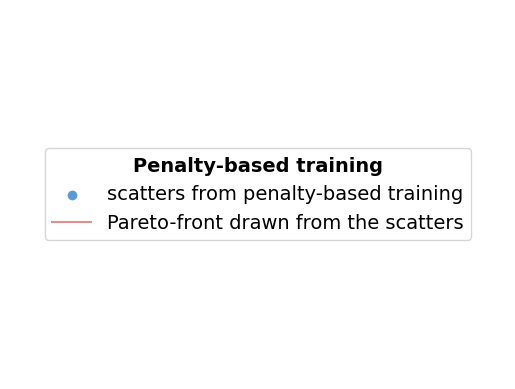

In [36]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot dummy data to create the legend
scatter = ax.scatter([], [], color='#5A9BD6', label='scatters from penalty-based training')  # Lighter blue
line, = ax.plot([], [], color='#E08E8E', label='Pareto-front drawn from the scatters')  # Lighter red

# Add the legend
legend = ax.legend(loc='center', fontsize=14, title="Penalty-based training")
plt.setp(legend.get_title(), fontsize=14, weight='bold')  # Customize the legend title

# Remove the axis for display purposes
ax.axis('off')

# Show the plot
plt.show()


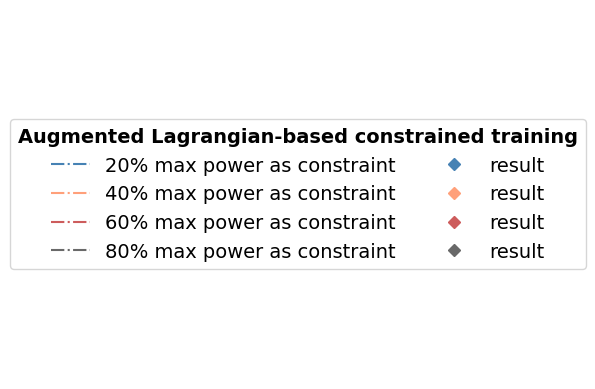

In [43]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Define line styles and markers for constraints and results
handles = [
    plt.Line2D([], [], color='#4682B4', linestyle='-.', label='20% max power as constraint'),  # Blue dashed-dot line
    plt.Line2D([], [], color='#FFA07A', linestyle='-.', label='40% max power as constraint'),  # Light salmon dashed-dot
    plt.Line2D([], [], color='#CD5C5C', linestyle='-.', label='60% max power as constraint'),  # Indian red dashed-dot
    plt.Line2D([], [], color='#696969', linestyle='-.', label='80% max power as constraint'),  # Dim gray dashed-dot
    plt.Line2D([], [], color='#4682B4', marker='D', linestyle='', label='result'),  # Blue marker
    plt.Line2D([], [], color='#FFA07A', marker='D', linestyle='', label='result'),  # Light salmon marker
    plt.Line2D([], [], color='#CD5C5C', marker='D', linestyle='', label='result'),  # Indian red marker
    plt.Line2D([], [], color='#696969', marker='D', linestyle='', label='result'),  # Dim gray marker
]

# Create the legend
legend = ax.legend(handles=handles, loc='center', fontsize=14, 
                   title="Augmented Lagrangian-based constrained training", ncol=2)
plt.setp(legend.get_title(), fontsize=14, weight='bold')

# Remove the axis for display purposes
ax.axis('off')

# Show the plot
plt.show()


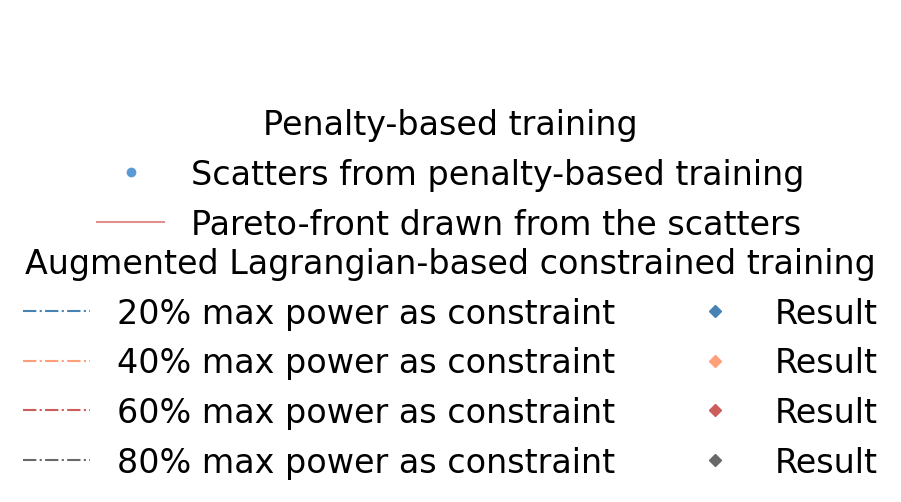

In [55]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))  # Larger figure size for better emphasis

# Define handles for the first legend (Penalty-based training)
penalty_handles = [
    plt.Line2D([], [], color='#5A9BD6', marker='o', linestyle='', label='Scatters from penalty-based training'),  # Light blue dot
    plt.Line2D([], [], color='#E08E8E', linestyle='-', label='Pareto-front drawn from the scatters')  # Pink line
]

# Define handles for the second legend (Augmented Lagrangian-based constrained training)
lagrangian_handles = [
    plt.Line2D([], [], color='#4682B4', linestyle='-.', label='20% max power as constraint'),  # Blue dashed-dot line
    plt.Line2D([], [], color='#FFA07A', linestyle='-.', label='40% max power as constraint'),  # Light salmon dashed-dot
    plt.Line2D([], [], color='#CD5C5C', linestyle='-.', label='60% max power as constraint'),  # Indian red dashed-dot
    plt.Line2D([], [], color='#696969', linestyle='-.', label='80% max power as constraint'),  # Dim gray dashed-dot
    plt.Line2D([], [], color='#4682B4', marker='D', linestyle='', label='Result'),  # Blue rhombus marker
    plt.Line2D([], [], color='#FFA07A', marker='D', linestyle='', label='Result'),  # Light salmon rhombus
    plt.Line2D([], [], color='#CD5C5C', marker='D', linestyle='', label='Result'),  # Indian red rhombus
    plt.Line2D([], [], color='#696969', marker='D', linestyle='', label='Result'),  # Dim gray rhombus
]

# Create the first legend
legend1 = ax.legend(handles=penalty_handles, loc='upper center', fontsize=24,  # Larger font
                    title="Penalty-based training", bbox_to_anchor=(0.5, 0.85), frameon=False)
plt.setp(legend1.get_title(), fontsize=24,)  # Bold title
# for text in legend1.get_texts():
#     text.set_weight('bold')  # Bold entries

# Create the second legend
legend2 = ax.legend(handles=lagrangian_handles, loc='upper center', fontsize=24,  # Larger font
                    title="Augmented Lagrangian-based constrained training", bbox_to_anchor=(0.5, 0.55), ncol=2, frameon=False)
plt.setp(legend2.get_title(), fontsize=24,)  # Bold title
# for text in legend2.get_texts():
#     text.set_weight('bold')  # Bold entries

# Add the first legend back to the plot (since the second legend overrides it)
ax.add_artist(legend1)

# Remove the axis for display purposes
ax.axis('off')

# Show the plot
plt.show()
